## Постановка задачи:

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Установливаем библиотеку Pandas:

In [1]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Импортируем необходимые модули:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML/fake_job_postings.csv')
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


Выводим первые 10 строк dataset-а:

In [5]:
data.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


Выводим последние 10 строк dataset-а:

In [6]:
data.tail(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17870,17871,Senior Financial Analyst (Retail),"US, CA, Gardena",NaN,NaN,PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17871,17872,Water Truck Driver,"US, PA, Waynesburg",NaN,NaN,Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,NaN,0,1,1,Full-time,NaN,NaN,Oil & Energy,NaN,0
17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,NaN,NaN,Internet,Product Management,0
17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,1,0,Contract,NaN,NaN,Utilities,NaN,0
17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


### О наборе данных:

Контекст

Этот набор данных содержит 119390 наблюдений для городского отеля и курортного отеля. Каждое наблюдение представляет собой бронирование отеля в период с 1 июля 2015 г. по 31 августа 2017 г., включая бронирование, которое фактически было получено, и бронирование, которое было отменено.

Содержание

Поскольку это реальные данные отеля, все элементы данных, относящиеся к отелю или идентификации клиента, были удалены.
Четыре столбца: «имя», «электронная почта», «номер телефона» и «кредитная карта» были искусственно созданы и добавлены в набор данных.

Благодарности

Данные взяты из статьи «Наборы данных о спросе на бронирование отелей», написанной Нуно Антонио, Аной Алмейдой и Луисом Нуньесом для Data in Brief, том 22, февраль 2019 г.

- `hotel` - Наборы данных содержат информацию о бронировании двух отелей. Один из отелей является курортным, а другой — городским.
- `is_canceled` - Значение, указывающее, было ли бронирование отменено (1) или нет (0).
- `lead_time` - Количество дней, прошедших между датой ввода бронирования в PMS и датой прибытия.
- `arrival_date_year` - Год даты прибытия.
- `arrival_date_month` - Месяц даты прибытия с 12 категориями: от «января» до «декабря».
- `arrival_date_week_number` - Номер недели даты прибытия.
- `arrival_date_day_of_month` - День месяца даты прибытия.
- `stays_in_weekend_nights` - Количество ночей в выходные дни (суббота или воскресенье), в течение которых гость останавливался или забронировал проживание в отеле.
- `stays_in_week_nights` - количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле BO и BL/Рассчитывается путем подсчета.
- `adults` - Количество взрослых.
- `children` - Количество детей.
- `babies` - Количество младенцев.
- `meal` - BB – Bed & Breakfast.
- `country` - Страна происхождения.
- `market_segment` - Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «ТО» означает «Туристические операторы».
- `distribution_channel` - Канал распространения бронирования. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туристические операторы».
- `is_repeated_guest` - Значение, указывающее, было ли имя бронирования от повторного гостя (1) или нет (0).
- `previous_cancellations` - Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования.
- `previous_bookings_not_canceled` - Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования.
- `reserved_room_type` - Код типа зарезервированного номера. Код представлен вместо обозначения из соображений анонимности.
- `assigned_room_type` - Код типа номера, присвоенного бронированию. Иногда назначенный тип номера отличается от зарезервированного типа номера по причинам, связанным с работой отеля (например, избыточное бронирование) или по желанию клиента. Код представлен вместо обозначения из соображений анонимности.
- `booking_changes` - Количество изменений/поправок, внесенных в бронирование с момента ввода бронирования в PMS до момента заселения или отмены.
- `deposit_type` - No Deposit – депозит не вносился; Non Refund – внесен залог в размере полной стоимости проживания; Возвратный – был внесен депозит в размере под общую стоимость проживания.
- `agent` - Идентификатор туристического агентства, оформившего бронирование.
- `company` - Идентификатор компании/организации, которая сделала бронирование или ответственна за оплату бронирования. Идентификатор представлен вместо обозначения из соображений анонимности.
- `days_in_waiting_list` - Количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту.
- `customer_type` - Группа – когда бронирование связано с группой; Временное — когда бронирование не является частью группы или контракта и не связано с другим временным бронированием; Transient-party — когда бронирование является временным, но связано как минимум с другим временным бронированием.
- `adr` - Средняя дневная ставка (рассчитывается путем деления суммы всех транзакций по размещению на общее количество ночей проживания).
- `required_car_parking_spaces` - Количество парковочных мест, необходимых клиенту.
- `total_of_special_requests` - Количество специальных запросов, сделанных клиентом (например, две односпальные кровати или верхний этаж).
- `reservation_status` - Check-Out – клиент зарегистрировался, но уже ушел; No-Show – клиент не зарегистрировался и не сообщил о причине.
- `reservation_status_date` - Дата, когда был установлен последний статус. Эту переменную можно использовать в сочетании с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля.
- `name` - Имя гостя (ненастоящее).
- `email` - Электронная почта (ненастоящая).
- `phone-number` - Номер телефона (ненастоящий).
- `credit_card` - Номер кредитной карты (ненастоящий).

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [8]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'title'], end="\n\n")
print(data["title"][2], end="\n\n")
print(data["title"].dtype, end="\n\n")
print(type(data["title"]), end="\n\n")
print(type(data["title"][2]), end="\n\n")

(17880, 18)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

RangeIndex(start=0, stop=17880, step=1)

Commissioning Machinery Assistant (CMA)

Commissioning Machinery Assistant (CMA)

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [9]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.describe(include = ['object'])

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [15]:
data.describe(include = 'all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [ ]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [58]:
data.corr()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
telecommuting,1.000000,-0.019836,0.020345,-0.027146,-0.019088,0.074151,0.005876,0.014919,0.034523
has_company_logo,-0.019836,1.000000,0.233932,0.002382,-0.125758,0.025535,-0.028530,-0.008359,-0.261971
has_questions,0.020345,0.233932,1.000000,-0.030921,-0.037868,0.029909,0.002531,0.013417,-0.091627
employment_type,-0.027146,0.002382,-0.030921,1.000000,-0.066785,0.140489,0.069462,-0.015797,0.031365
required_experience,-0.019088,-0.125758,-0.037868,-0.066785,1.000000,-0.141672,0.034010,0.058948,0.029351
required_education,0.074151,0.025535,0.029909,0.140489,-0.141672,1.000000,0.002553,-0.056305,0.033287
industry,0.005876,-0.028530,0.002531,0.069462,0.034010,0.002553,1.000000,0.076092,0.034838
function,0.014919,-0.008359,0.013417,-0.015797,0.058948,-0.056305,0.076092,1.000000,-0.094321
fraudulent,0.034523,-0.261971,-0.091627,0.031365,0.029351,0.033287,0.034838,-0.094321,1.000000


Визуализируем данную матрицу корреляции:

In [13]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


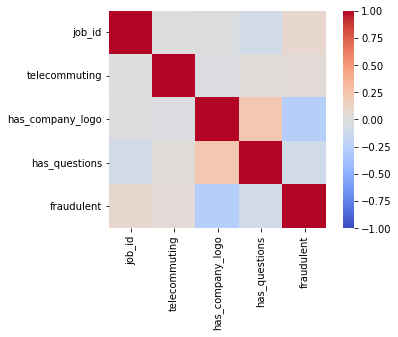

In [18]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Выведем уникальные значения для некоторых нечисловых признаков:

In [23]:
data['location'].unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [24]:
data['department'].unique()

array(['Marketing', 'Success', nan, ..., 'Admin - Clerical',
       'Administrative Dept', 'Hospitality'], dtype=object)

## Готовим данные

Для предсказания оригинальности вакансии будем использовать все признаки, кроме: job_id, location, department, salary_range, description, title, company_profile, benefits, requirements.

In [27]:
data=data.drop(['job_id','location','department','salary_range','description','title','company_profile','benefits','requirements'],axis=1)

Рассортируем категориальные и численные признаки:

In [28]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['employment_type', 'required_experience', 'required_education', 'industry', 'function']
['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


Выведем все уникальные значения для каждого категориального признака:

In [29]:
for c in categorical_columns:
    print(f"{c}: {data[c].unique()}")

employment_type: ['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary']
required_experience: ['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director']
required_education: [nan "Bachelor's Degree" "Master's Degree" 'High School or equivalent'
 'Unspecified' 'Some College Coursework Completed' 'Vocational'
 'Certification' 'Associate Degree' 'Professional' 'Doctorate'
 'Some High School Coursework' 'Vocational - Degree'
 'Vocational - HS Diploma']
industry: [nan 'Marketing and Advertising' 'Computer Software'
 'Hospital & Health Care' 'Online Media'
 'Information Technology and Services' 'Financial Services'
 'Management Consulting' 'Events Services' 'Internet'
 'Facilities Services' 'Consumer Electronics' 'Telecommunications'
 'Consumer Services' 'Construction' 'Oil & Energy' 'Education Management'
 'Building Materials' 'Banking' 'Food & Beverages' 'Food Production'
 'Health, Wellness and Fitness' 'Insurance' 'E-Learning' 'Cosmetics'


In [30]:
data.isnull().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [31]:
columns_list=list(data.columns)

for i in columns_list:
    if data[i].dtype=='object':
        data[i]=data[i].replace(np.nan,data[i].mode()[0],regex=True)

data.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#Присваивание меток объектам типа 'object'
for i in columns_list:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])
        
x=data.drop(['fraudulent'],axis=1)
y=data['fraudulent']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_test_predict = knn.predict(x_test)
y_train_predict = knn.predict(x_train)
err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [39]:
print(err_train)
print(err_test)

0.03887024608501118
0.03467561521252797


In [40]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[13521    70]
 [  486   227]]

[[3404   19]
 [ 105   48]]



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


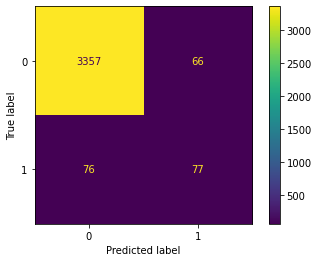

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test) 

Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку (работает очень медленно):

In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(X_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

Лучший результат достигается при n=1:

In [48]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train)

err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test  != knn.predict(x_test))

print(err_train)
print(err_test)

0.02111297539149888
0.03970917225950783


## Другие алгоритмы обучения:

### SVC:

In [50]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)

err_train = np.mean(y_train != svc.predict(x_train))
err_test  = np.mean(y_test  != svc.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.02985178970917226
0.03271812080536913


### Random Forest:

In [56]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

err_train = np.mean(y_train != rf.predict(x_train))
err_test  = np.mean(y_test  != rf.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.01880592841163311
0.024888143176733782


### Extremely Randomized Trees:

In [55]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(x_train, y_train)

err_train = np.mean(y_train != ert.predict(x_train))
err_test  = np.mean(y_test  != ert.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.01880592841163311
0.025447427293064876


### AdaBoost:

In [52]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(x_train, y_train)

err_train = np.mean(y_train != ada.predict(x_train))
err_test = np.mean(y_test != ada.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.04697986577181208
0.03998881431767338


### GBT:

In [53]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(x_train, y_train)

err_train = np.mean(y_train != gbt.predict(x_train))
err_test = np.mean(y_test != gbt.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.02418903803131991
0.027404921700223715


Наилуший результат показывает Random Forest и GBT. Ошибка на тестовой выборке состовляет ~ 0.013. При этом, на обучение алгоритмом Random Forest затрачивается намного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.
